# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture and contents industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analysing project on my own. I played(?) with this data almost a month or more. Finally, I can close the analysis joyfully.  
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch colum). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


##### **Contents list**
---
1. data remaking (dummy etc)
2. data distribution (all round veiwing)
3. questions : result, processing, add commentary(그외 추가 이야기 및 부족한 것 필요한 것 개선 방향)
4. what I analized with this dataset(my files)

## Importin Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
2.9.1
2.9.0


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 1. rankers by ladder
---
##### Q1. A total number of players in each division, usage of each class in descending order.

First I understood that question want to know about each class ratio in each ladder. And it is true maybe.  
(But... I think this question has to be more clear about 'players'. Because there're quite many users have multiple characters which are on ranked.)  

So I categorized meaning of 'players' as characters and users. 



## 1-1. id(character) and users in each ladder

In [6]:
# id, rank, account unique numbers

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("ladder:", i)
    print("number of unique id:", df[df['ladder'] == i]['id'].nunique())
    print("number of unique rank:", df[df['ladder'] == i]['rank'].nunique())
    print("number of unique account:", df[df['ladder'] == i]['account'].nunique())
    print("max value of the rank:", df[df['ladder'] == i]['rank'].max())
    print('---------------------------------')

ladder: Harbinger
number of unique id: 14918
number of unique rank: 14918
number of unique account: 13160
max value of the rank: 15000
---------------------------------
ladder: Hardcore Harbinger
number of unique id: 14905
number of unique rank: 14905
number of unique account: 9020
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger
number of unique id: 14981
number of unique rank: 14981
number of unique account: 10214
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger HC
number of unique id: 14972
number of unique rank: 14972
number of unique account: 6374
max value of the rank: 15000
---------------------------------


## 1-2. Answer: characters number of each class in each ladder

We can all class and ladder mode put together in one data frame for analyzing, and also make them seperately to see comfortable.  
First one, we can compare the number of specific class with other ladders easily.  
Second method, we can compare the number of specific ladder with other classes.

In [7]:
# pivot by class and ladder to one Data frame

df_cha_bylad = df.pivot_table(values = 'account', index = 'ladder', columns = 'class', aggfunc = 'count', margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_cha_bylad = df_cha_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_cha_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_cha_bylad.drop(index = 26, inplace = True)
df_cha_bylad

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3754,865,1000,1149,740
1,Assassin,679,225,274,72,108
2,Berserker,8711,1644,2290,2064,2713
3,Champion,1216,338,262,490,126
4,Chieftain,2130,693,456,690,291
5,Deadeye,719,193,280,167,79
6,Duelist,65,55,10,0,0
7,Elementalist,1326,432,541,160,193
8,Gladiator,4900,1576,1320,1356,648
9,Guardian,1177,101,66,661,349


In [8]:
# if you want to see it seperated by ladder

# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Pathfinder      3428
Berserker       2713
Raider          1943
Slayer          1706
Necromancer     1207
Ascendant        740
Gladiator        648
Inquisitor       559
Guardian         349
Chieftain        291
Trickster        211
Elementalist     193
Juggernaut       187
Saboteur         177
Occultist        151
Champion         126
Assassin         108
Hierophant       102
Deadeye           79
Name: id, dtype: int64

In [9]:
# Harbinger HC

df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2099
Berserker       2064
Gladiator       1356
Slayer          1343
Ascendant       1149
Raider           895
Trickster        834
Inquisitor       828
Chieftain        690
Juggernaut       672
Guardian         661
Champion         490
Pathfinder       416
Hierophant       398
Saboteur         304
Occultist        301
Deadeye          167
Elementalist     160
Assassin          72
Ranger             4
Marauder           1
Scion              1
Name: id, dtype: int64

In [10]:
# SSF Harbinger 

df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Berserker       2290
Necromancer     1716
Raider          1486
Gladiator       1320
Slayer          1301
Ascendant       1000
Trickster        955
Inquisitor       952
Hierophant       557
Elementalist     541
Chieftain        456
Juggernaut       437
Saboteur         407
Occultist        367
Deadeye          280
Assassin         274
Champion         262
Pathfinder       236
Guardian          66
Witch             21
Ranger            13
Shadow            10
Duelist           10
Marauder          10
Scion              8
Templar            6
Name: id, dtype: int64

In [11]:
# SSF Harbinger HC

df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2055
Berserker       1644
Gladiator       1576
Slayer          1135
Trickster       1058
Inquisitor      1052
Ascendant        865
Raider           826
Juggernaut       734
Chieftain        693
Hierophant       668
Elementalist     432
Occultist        413
Saboteur         393
Champion         338
Assassin         225
Deadeye          193
Pathfinder       159
Guardian         101
Witch             98
Marauder          84
Templar           65
Duelist           55
Scion             43
Shadow            36
Ranger            31
Name: id, dtype: int64

## 1-3. (plus) characters ratio of each class in each ladder (descending order)

In [12]:
# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Harbinger'].shape[0] * 100

class
Pathfinder     22.98
Berserker      18.19
Raider         13.02
Slayer         11.44
Necromancer     8.09
Ascendant       4.96
Gladiator       4.34
Inquisitor      3.75
Guardian        2.34
Chieftain       1.95
Trickster       1.41
Elementalist    1.29
Juggernaut      1.25
Saboteur        1.19
Occultist       1.01
Champion        0.84
Assassin        0.72
Hierophant      0.68
Deadeye         0.53
Name: id, dtype: float64

In [13]:
# HC Harbinger
df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'Hardcore Harbinger'].shape[0] * 100

class
Necromancer    14.08
Berserker      13.85
Gladiator       9.10
Slayer          9.01
Ascendant       7.71
Raider          6.00
Trickster       5.60
Inquisitor      5.56
Chieftain       4.63
Juggernaut      4.51
Guardian        4.43
Champion        3.29
Pathfinder      2.79
Hierophant      2.67
Saboteur        2.04
Occultist       2.02
Deadeye         1.12
Elementalist    1.07
Assassin        0.48
Ranger          0.03
Marauder        0.01
Scion           0.01
Name: id, dtype: float64

In [14]:
# SSF Harbinger
df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger'].shape[0] * 100

class
Berserker      15.29
Necromancer    11.45
Raider          9.92
Gladiator       8.81
Slayer          8.68
Ascendant       6.68
Trickster       6.37
Inquisitor      6.35
Hierophant      3.72
Elementalist    3.61
Chieftain       3.04
Juggernaut      2.92
Saboteur        2.72
Occultist       2.45
Deadeye         1.87
Assassin        1.83
Champion        1.75
Pathfinder      1.58
Guardian        0.44
Witch           0.14
Ranger          0.09
Shadow          0.07
Duelist         0.07
Marauder        0.07
Scion           0.05
Templar         0.04
Name: id, dtype: float64

In [15]:
# SSF Harbinger HC
df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'SSF Harbinger HC'].shape[0] * 100

class
Necromancer    13.73
Berserker      10.98
Gladiator      10.53
Slayer          7.58
Trickster       7.07
Inquisitor      7.03
Ascendant       5.78
Raider          5.52
Juggernaut      4.90
Chieftain       4.63
Hierophant      4.46
Elementalist    2.89
Occultist       2.76
Saboteur        2.62
Champion        2.26
Assassin        1.50
Deadeye         1.29
Pathfinder      1.06
Guardian        0.67
Witch           0.65
Marauder        0.56
Templar         0.43
Duelist         0.37
Scion           0.29
Shadow          0.24
Ranger          0.21
Name: id, dtype: float64

## 1-4. Visualization

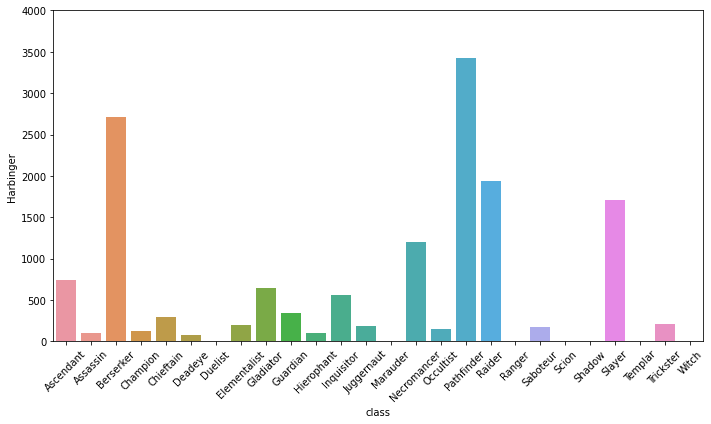

In [16]:
# if you want to see as seperated by ladder (case when 'Harbinger')

plt.subplots(figsize = (10, 6))

plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=45, fontsize=10)

sns.barplot(x = 'class', y = 'Harbinger', data = df_cha_bylad)
plt.tight_layout()
plt.show()

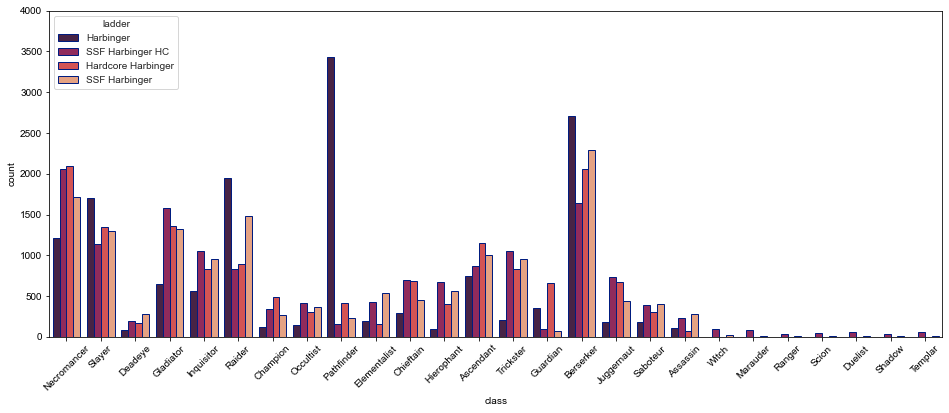

In [17]:
# if you want to see all of them

plt.rcParams["figure.figsize"] = (16, 6)
plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=45, fontsize=10)
sns.set_style('whitegrid')
ax = sns.countplot(data = df, x = 'class',
              palette="rocket", edgecolor=sns.color_palette("dark", 1), hue = 'ladder') 

## 1-5. Result

There's some prefered classes in each ladder.  
In Harbinger, the most common mode, Pathfinder is most one. And Necromancer is the most prefered in Harbinger hardcore mode. (Berserk was on the same level.)  
In SSF Harbinger, the solo mode, the most picked one is Berserker and Necromancer is also prefered too.  
In SSF Harbinger hardcore, the most one is Necromancer and Berserker is also prefered.  


I want to add this, this is results of preference of class division in each ladder.  
X category means pre-class, like 'witch', 'Duelist', 'Templar' etc.  
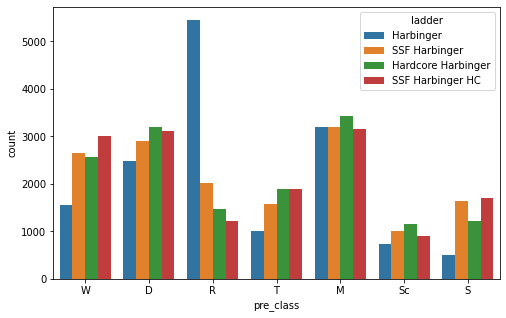

Necromancer or Berserker are prefered in other modes, but Pathfinder is prefered class especially Harbinger.  
We may have to consider that all of them(Necromancer and Berserker and Pathfinder) is one-stat classes.  
And Each class is among the Intelligence, Strength, Dexterity stat.  


# 2. Are streamers better or not?
---
##### Q2. Some of the players streaming their game (twitch column). Do they play better than people who does not streaming?

1. We have to set the standard of 'play better' means, so I treat the rank of characters to the 'better play'. Maybe there's more criteria like ranking of 'exp' or 'level', 'challenge' contrasts.  
But I just used the **rank** because they are ranked players, they are already skilled enough to base their rankings on the number of challenges or levels. In addition, it is because there are many variables that affect classes, parties, items, and skill trees to compare them on other criteria other than game modes, and we cannot know everything in detail.

2. And there's some cases that one twitch streamer has multiple account or characters. And also, one user has multiple character on rank chart. (I discovered it when I analyze the dataset before this project.)
So I assummed that one account or one twitch id means one user(one twitch inclueds multiple account).

3. And there's some missing rank in each ladder. When I analyzing the data personally, I substituted the missing data by updating to rank only the data we have. But I used the original rank on this analysis.



4. sequence
    1. normaly get the average from all dataframe
    2. get the average from each player(user)'s average rank
    3. get the average from each player(user)'s median rank
    4. statistical significance test

In [18]:
df['twitch'].describe()

count                16300
unique                9613
top       thespunkylobster
freq                    18
Name: twitch, dtype: object

In [19]:
df[df['twitch'].isna() == False]

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
...,...,...,...,...,...,...,...,...,...,...,...,...
59761,14997,False,False,Semirf,94,Chieftain,88f31e056e4ea4c56c1fb5a4a6b5e02ba1ec093ffa028c...,2720815490,priima,26,semikreisi,Harbinger
59764,14998,False,False,Sorryffs,73,Trickster,4708b0689eac845650f7040056d3e1c6a597a3121ec815...,495220075,AFKpirate,24,skoltrrs,SSF Harbinger
59768,14999,True,False,SSFHCRamboMustDieOften,53,Necromancer,0d4fc2dd7e295c8b9c6db4d6cc8e0036ea3789800fcf9c...,77914551,iskayfleyks,29,iskayfleyks,SSF Harbinger HC
59771,14999,True,False,ПроклятьеРекласта,89,Necromancer,d33b4f6e08c10e365765f9a36a8f36d561fd1d86f10ee1...,1786695653,Romanchik002,18,romanchik002,Hardcore Harbinger


In [20]:
# you can see how much missing values in rank are there by ladder

print(df[df['ladder'] == 'Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'Hardcore Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger HC']['rank'].nunique())

14918
14905
14981
14972


In [21]:
# Let's divide the dataset as whether 'twitch' column is null or not

df_twt = df[df['twitch'].isna() == False]
df_twt_non = df[df['twitch'].isna() == True]

## 2-1. normal average of rank simply

normaly get the average from all dataframe

In [22]:
# twtich streamers rank average of each id
df_twt['rank'].sum() / df_twt['rank'].count()

7101.554355828221

In [23]:
# not streamers rank average of each id
df_twt_non['rank'].sum() / df_twt_non['rank'].count()

7643.018308952065

## 2-2. average by account

get the average from each player(user)'s average rank

In [24]:
# grouping by twitch and get average 'rank' of each player streaming on twitch

avg_twt = df_twt.groupby(by = 'twitch')['rank'].sum() / df_twt.groupby(by = 'twitch')['id'].count()
avg_twt

twitch
001100010010       8,512.00
00mis             12,142.00
0815_noobhunter    5,570.00
0cxjwbu213c13        997.00
0lede4            14,788.00
                     ...   
zyc0billyfr34k     3,605.00
zykenus            4,032.00
zyldragoon         4,713.00
zyrhon            14,712.00
zyrobyte           6,571.00
Length: 9613, dtype: float64

In [25]:
# get the average rank of each streaming players 

np.average(avg_twt)

7479.202758592788

In [26]:
# grouping by twitch and get average 'rank' of each non_streaming players

avg_twt_non = df_twt_non.groupby(by = 'account')['rank'].sum() / df_twt_non.groupby(by = 'account')['id'].count()
avg_twt_non

account
..A_A                 5,350.67
0010                  5,012.00
00fant                5,736.29
0203                  7,111.80
02zy                  8,575.00
                        ...   
脸黑的艺术家陈               4,721.00
雪ノ下雪乃                10,329.00
鹿島アントラーズFC_強化部_鈴木満    3,881.00
누여김                   7,520.00
람색스                  10,587.00
Length: 27505, dtype: float64

In [27]:
# get the average rank of each non_streaming players

np.average(avg_twt_non)

7966.844983149482

### 2-2-1. median rank of each player's average rank

In [28]:
np.median(avg_twt)

7425.0

In [29]:
np.median(avg_twt_non)

8037.0

## 2-3. median rank of each player and get average

get the average from each player(user)'s median rank

In [30]:
# grouping by twitch and get average 'rank' of each twitch streaming player's median rank

med_twt = df_twt.groupby(by = 'twitch')['rank'].median()
med_twt

twitch
001100010010       8,512.00
00mis             12,142.00
0815_noobhunter    5,570.00
0cxjwbu213c13        997.00
0lede4            14,788.00
                     ...   
zyc0billyfr34k     3,605.00
zykenus            4,032.00
zyldragoon         4,713.00
zyrhon            14,712.00
zyrobyte           6,571.00
Name: rank, Length: 9613, dtype: float64

In [31]:
# get the average rank of each streaming player's median rank

np.average(med_twt)

7435.413606574431

In [32]:
# grouping by twitch and get average 'rank' of each non_streaming player's median rank

med_twt_non = df_twt_non.groupby(by = 'account')['rank'].median()
med_twt_non

account
..A_A                 5,471.00
0010                  5,012.00
00fant                5,082.00
0203                  7,778.00
02zy                  8,575.00
                        ...   
脸黑的艺术家陈               4,721.00
雪ノ下雪乃                10,329.00
鹿島アントラーズFC_強化部_鈴木満    3,881.00
누여김                   5,876.00
람색스                  10,587.00
Name: rank, Length: 27505, dtype: float64

In [33]:
# get the average rank of each non_streaming player's median rank

np.average(med_twt_non)

7939.01946918742

### 2-3-1. median rank of each player's median rank

In [34]:
np.median(med_twt)

7395.5

In [35]:
np.median(med_twt_non)

8039.5

## 2-4. Visualizing each value

In [36]:
x = ['Arithmetic mean - Twitch_user', 'Arithmetic mean - normal_user', 
     'Mean of rank average - Twitch_user', 'Mean of rank average - normal_user', 
     'Mean of rank median - Twitch_user', 'Mean of rank median - normal_user']

In [37]:
y = [df_twt['rank'].sum() / df_twt['rank'].count(),
df_twt_non['rank'].sum() / df_twt_non['rank'].count(),
np.average(avg_twt),
np.average(avg_twt_non),
np.average(med_twt),
np.average(med_twt_non)]

In [38]:
y

[7101.554355828221,
 7643.018308952065,
 7479.202758592788,
 7966.844983149482,
 7435.413606574431,
 7939.01946918742]

<BarContainer object of 6 artists>

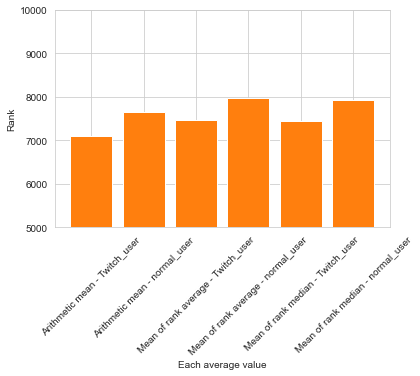

In [39]:
plt.figure(figsize = (6,4))
plt.bar(x = x, height = y)
plt.xlabel('Each average value')
plt.ylabel('Rank')
plt.ylim(bottom = 5000, top = 10000)
plt.xticks(rotation=45, fontsize=10)
plt.bar(x = x, height = y)

## 2-5. Independent sample t-test: Statistical significance

T-test is test about a statistical comparison of the means of two independent samples, as you know.  
_I don't think the statistical significance is not significant for this, especially little size data. The data size is so little so we can't discuss about Gaussian distribution or etc. But I think it's meaningful just to check even if it's not used somewhere._

"This test assumes that the populations have identical variances by default.". If they have significant difference in group average, the values tell us. 

What I was wandering about was which one is I have to use among these, df_twt, avg_twt, med_twt.  
First, I think the df_twt and df_twt_non have a critical problem with that there are multiple characteres a single user has. It can't be   a real answer of the question means(intention).
Second, the average of each player(not single character single user) rank has problem also. It can't convince that itself is represent the user. 
Third, I think the median is not bad but there is a tendency to add or subtract the existence of other details.

I used the second one(average of each player) but, it would be grateful that I can get an advice about this. 😚

### 1. variances checking

In [40]:
# # The numpy float print setting is dead X-(
# import numpy as np
# np.set_printoptions(precision=5)

In [41]:
# variance checking

print("variances in whole dataframe: {}, {}".format(np.var(df_twt['rank']), np.var(df_twt_non['rank'])))
print("variances in the rank average by account: {}, {}".format(np.var(avg_twt), np.var(avg_twt_non)))
print("variances in the rank median by account: {}, {}".format(np.var(med_twt), np.var(med_twt_non)))

variances in whole dataframe: 19303429.56974483, 18462760.2480317
variances in the rank average by account: 15190904.766799761, 15140717.71229186
variances in the rank median by account: 15972641.266566137, 15692283.86503633


### 2. Before the test we should do sampling in the average of each user.

귀무가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 없다.
대립가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 있다.


In [42]:
from numpy import random

sample_twt = random.choice(avg_twt, size = 1000, replace = False)
sample_twt_non = random.choice(avg_twt_non, size = 1000, replace = False)

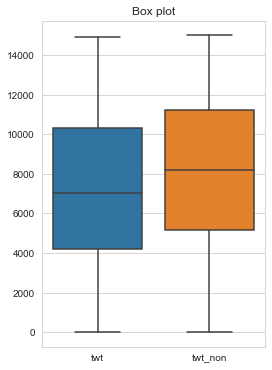

In [43]:
# boxplot of sampled data

data = pd.DataFrame()
data['twt'] = sample_twt
data['twt_non'] = sample_twt_non

plt.figure(figsize=(4,6))
sns.boxplot(data=data)
plt.title('Box plot')
plt.show()

### 3. normality test

In [44]:
# normality test

from scipy.stats import shapiro

sha_twt = shapiro(sample_twt)
sha_twt_non = shapiro(sample_twt_non)
print(sha_twt, sha_twt_non)

ShapiroResult(statistic=0.9757128357887268, pvalue=6.987705986755133e-12) ShapiroResult(statistic=0.973939836025238, pvalue=2.0651238965413432e-12)


all of p-value is more than 0.05, so normality has no problem.

### 4. Considering Homogeneity of Variance Test

In [45]:
# Homogeneity of Variance Test: levene, bartelett all

from scipy.stats import levene
print(levene(sample_twt, sample_twt_non))

from scipy.stats import bartlett
print(bartlett(sample_twt, sample_twt_non))

LeveneResult(statistic=0.13773139649630844, pvalue=0.7105861546930997)
BartlettResult(statistic=0.16056687035286293, pvalue=0.6886351485382827)


p-value is more than 0.05, so we can say they has a homogeneity of variance.

#p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음. 
#등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.

### 5. t-test_indepedance()

In [46]:
import scipy.stats

scipy.stats.ttest_ind(sample_twt, sample_twt_non)

Ttest_indResult(statistic=-5.256398432354366, pvalue=1.6258446416649823e-07)

The null hypothesis is selected because the p-value is greater than 0.05.  
That is, statistically, the difference between the two groups is meaningless.  

#### (plus)If I just put the data at the ttest...

In [47]:
# If we compare the rank average by account(player)
scipy.stats.ttest_ind(avg_twt, avg_twt_non, equal_var=False)

Ttest_indResult(statistic=-10.563785576496528, pvalue=5.294341099747472e-26)

In [48]:
# If we compare the rank medium by account(player)
scipy.stats.ttest_ind(med_twt, med_twt_non, equal_var=False)

Ttest_indResult(statistic=-10.658987259579916, pvalue=1.926325123676089e-26)

In [49]:
import scipy.stats

# Just simply comparing the rank average
scipy.stats.ttest_ind(df_twt['rank'], df_twt_non['rank'], equal_var=False)

Ttest_indResult(statistic=-13.498655643209066, pvalue=2.1307871650784414e-41)

#### Confidence interval 

_code reference: https://jae-eun-ai.tistory.com/48_

In [50]:
from numpy import array, mean
from scipy.stats import sem, t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(avg_twt)

(7479.202758592788, 7401.275800957531, 7557.129716228045)

In [51]:
mean_confidence_interval(avg_twt_non)

(7966.844983149482, 7920.857196814887, 8012.832769484076)

## Result: Answer is "Well...No..."

_I don't know how to make it better. I think it would be better if I could improve my ability to name 'variables'. XD_

We can see the average rank of them by various methods. There's a difference in numbers obviously between the Twitch streamers and the non-streaming players.  

But I'd like to say 'no'. It's not about p-value.
It must need the more bigger or detailed data if we discuss about this, I think. 

# 3. Case when we were Necromancer
---
##### Q3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.

Actually I don't know exactly 'stream' means, but I think it would be the twitch streaming. So, I devided that all of Necromancer characters and Necromancer characters with twitch streaming.  
In this case, we can think the question like this:  
    1. simply get the rate of Necromancer in top 30 by ladder  
    2. make a model with 'rank', 'class', 'ladder', 'twitch' columns and predict.

In [85]:
# check the rank number in each ladder whether there is a null or not. 

df[df['rank']<=30].groupby('ladder')['rank'].nunique()

ladder
Harbinger             30
Hardcore Harbinger    30
SSF Harbinger         30
SSF Harbinger HC      30
Name: rank, dtype: int64

## 3-1. Let's see what classes in top 30 and thier rate.

In [128]:
# in top 30 classes ratio 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0,2,2,0
Berserker,2,1,3,0
Champion,1,2,0,2
Chieftain,0,1,1,1
Deadeye,1,2,0,0
Elementalist,1,0,1,0
Gladiator,1,4,3,3
Guardian,2,1,0,0
Hierophant,0,0,1,0


In [130]:
# in top 30 classes ratio 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0.00,6.67,6.67,0.00
Berserker,6.67,3.33,10.00,0.00
Champion,3.33,6.67,0.00,6.67
Chieftain,0.00,3.33,3.33,3.33
Deadeye,3.33,6.67,0.00,0.00
Elementalist,3.33,0.00,3.33,0.00
Gladiator,3.33,13.33,10.00,10.00
Guardian,6.67,3.33,0.00,0.00
Hierophant,0.00,0.00,3.33,0.00


In [205]:
list(df_30pi.columns)

['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

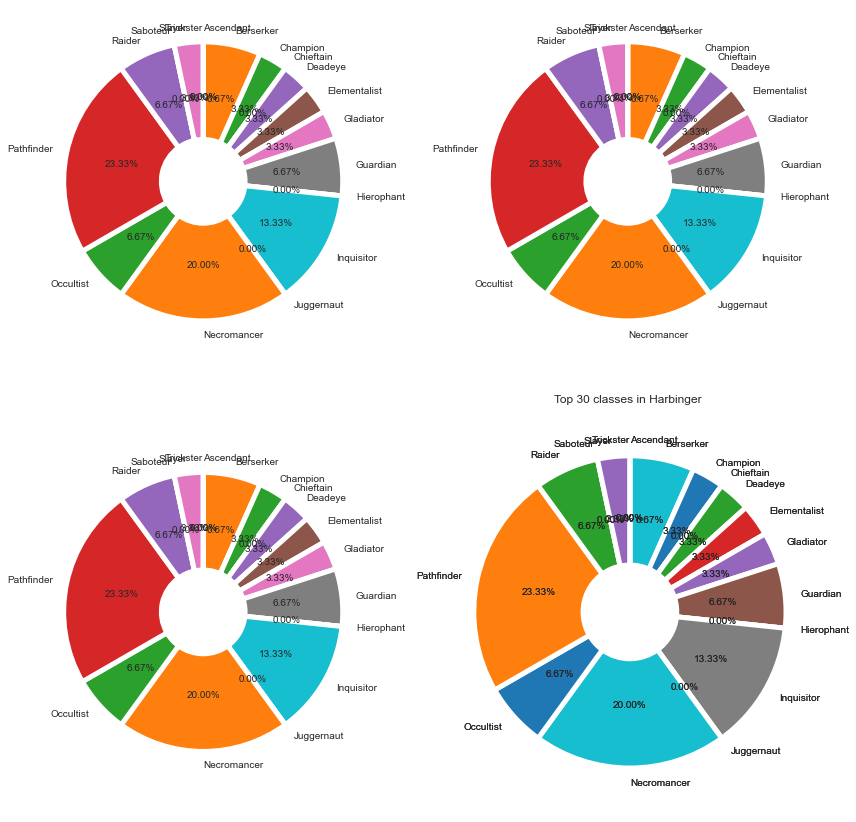

In [230]:
# visualization

df_30pi = df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

ratio = df_30pi['Harbinger']
labels = df_30pi.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))

ax[0][0].pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
ax[0][1].pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
ax[1][0].pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
ax[1][1].pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)

# ax[0, 0].set_title("{} mode".format(labels[0]))
# ax[0, 1].set_title("{} mode".format(labels[1]))
# ax[1, 0].set_title("{} mode".format(labels[2]))
# ax[1, 1].set_title("{} mode".format(labels[3]))

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.title("Top 30 classes in Harbinger")
plt.axis('equal')

fig.tight_layout()
plt.show()

In [ ]:
# make for repeatation

Necromancers take 20% in top 30 except SSF Harbinger HC mode.  
In SSF Harbinger HC mode, Necromancers take 36.67% in top 30. 


## 3-2. (not care of stream) ratio in top 30 among the Necromancers

In [99]:
df_Nec = df[(df['class'] == 'Necromancer')]
df_Nec30 = df_Nec[df_Nec['rank']<=30]

<AxesSubplot:xlabel='ladder', ylabel='rank'>

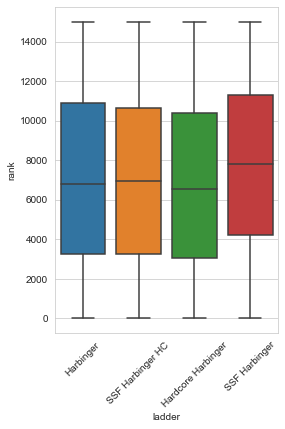

In [100]:
# Necromancers rank boxplot by ladder

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_Nec, x = 'ladder', y = 'rank')

In [101]:
# All Necromancers by ladder

df_Nec.groupby('ladder')['id'].count()

ladder
Harbinger             1207
Hardcore Harbinger    2099
SSF Harbinger         1716
SSF Harbinger HC      2055
Name: id, dtype: int64

In [102]:
# Necromancers Who are in top 30 by ladder

df_Nec30.groupby('ladder')['id'].count()

ladder
Harbinger              6
Hardcore Harbinger     6
SSF Harbinger          6
SSF Harbinger HC      11
Name: id, dtype: int64

In [88]:
# Necromancers Who are in top 30 by ladder unique values

df_Nec30.groupby(by = 'ladder').nunique()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch
ladder,,,,,,,,,,,
Harbinger,6,1,1,6,1,1,6,1,6,4,6
Hardcore Harbinger,6,1,1,6,1,1,6,1,6,6,5
SSF Harbinger,6,1,1,6,3,1,6,4,6,5,2
SSF Harbinger HC,11,2,2,11,3,1,11,6,11,9,7


In [107]:
# Necromancers Who are in top 30 among all Necromancers by ladder
# df_Nec 중 30위 안에드는 네크로맨서들은 전체 네크로맨서에서 몇 퍼나 되는가?

df_Nec30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.50
Hardcore Harbinger   0.29
SSF Harbinger        0.35
SSF Harbinger HC     0.54
Name: id, dtype: float64

In [131]:
# Necromancers who are in top 30 among all characters by ladder
# df 중 30위 안에드는 네크로맨서들은 전체 데이터 에서 몇 퍼나 되는가?

df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.04
Hardcore Harbinger   0.04
SSF Harbinger        0.04
SSF Harbinger HC     0.07
Name: id, dtype: float64

In [135]:
type(df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100)

pandas.core.series.Series

근데 이들, 생각보다 랭크가 높다. 무려 세개의 부문에서 1등을 하고 있음.

30등 안에 들은 비율들을 클래스별로 내본다.

그다음 총 클래스가 26개인 것을 고려해서 최소 ladder 별로 1퍼센트 이상이 되면 꽤 많은 것 이런식으로 가도 될 것 같고.

30등 안에 들을 확률이 높은 일부 랭크 안에서도 구해서 가중? 치를 두어도 될 것 같다는 생각이 들음.

### 각 클래스들 중에서 각 클래스를 선택했을 때 30위 안에 들 확률은 각 얼마나되는가

In [ ]:
# classes sho are in top 30 among each classes by ladder
# 30위 안에드는 해당 직업 캐릭터들은 각 직업 전체 중에서 몇 퍼나 되는가?


classes = list(df['class'].unique())
# concatingdf = pd.DataFrame()

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    print("# {} : top 30 ratio(%) in each class by ladder".format(i))
    print(ser)
    print("==========================================")
    if i == classes[0]:
        ser1 = ser
    else:
        ser2
        concatingdf = pd.concat([ser1, ser], axis=1, ignore_index=True)

In [193]:
classes = list(df['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    print("# {} : top 30 ratio(%) in each class by ladder".format(i))
    print(ser)
    print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf = pd.concat([concatingdf, ser2], axis=1, ignore_index=True)

# Necromancer : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.50
Hardcore Harbinger   0.29
SSF Harbinger        0.35
SSF Harbinger HC     0.54
Name: id, dtype: float64
# Slayer : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.06
Hardcore Harbinger   0.15
SSF Harbinger        0.23
SSF Harbinger HC     0.53
Name: id, dtype: float64
# Deadeye : top 30 ratio(%) in each class by ladder
ladder
Harbinger            1.27
Hardcore Harbinger   1.20
SSF Harbinger         NaN
SSF Harbinger HC      NaN
Name: id, dtype: float64
# Gladiator : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.15
Hardcore Harbinger   0.29
SSF Harbinger        0.23
SSF Harbinger HC     0.19
Name: id, dtype: float64
# Inquisitor : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.72
Hardcore Harbinger   0.36
SSF Harbinger        0.11
SSF Harbinger HC     0.19
Name: id, dtype: float64
# Raider : top 30 ratio(%) in each class by ladder
l

In [194]:
concatingdf

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
ladder,,,,,,,,,,,,,,,,,,,,,
Harbinger,0.50,0.06,1.27,0.15,0.72,0.10,0.79,1.32,0.20,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hardcore Harbinger,0.29,0.15,1.20,0.29,0.36,NaN,0.41,0.66,0.48,NaN,...,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSF Harbinger,0.35,0.23,NaN,0.23,0.11,0.20,NaN,NaN,1.27,0.18,...,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSF Harbinger HC,0.54,0.53,NaN,0.19,0.19,0.36,0.59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3-3. (with stream) ratio in top 30 among the Necromancers

In [98]:
# set dataframes of Necromancers who's twitch column is not null.

df_NecTw = df_Nec[df_Nec['twitch'].isnull()==False]
df_NecTw30 = df_NecTw[df_NecTw['rank']<=30]

<AxesSubplot:xlabel='ladder', ylabel='rank'>

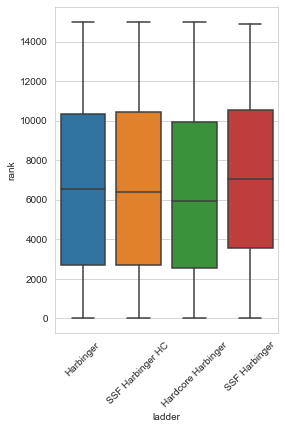

In [103]:
# Necromancers with stream rank boxplot by ladder

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_NecTw, x = 'ladder', y = 'rank')

In [104]:
# All Necromancers by ladder - with stream

df_NecTw.groupby('ladder')['id'].count()

ladder
Harbinger             374
Hardcore Harbinger    765
SSF Harbinger         307
SSF Harbinger HC      556
Name: id, dtype: int64

In [105]:
# Necromancers Who are in top 30 by ladder - with stream

df_NecTw30.groupby('ladder')['id'].count()

ladder
Harbinger             6
Hardcore Harbinger    5
SSF Harbinger         2
SSF Harbinger HC      7
Name: id, dtype: int64

노 스트림에서는

1. 모든 직업별로 30위 안에드는 비율, 그 직업들 중 네크로맨서는 몇위인지.

2. df 중 30위 안에드는 네크로맨서들은 전체 데이터 에서 몇 퍼나 되는가?

3. df_Nec 중 30위 안에드는 네크로맨서들은 전체 네크로맨서에서 몇 퍼나 되는가?

4. 내가 네크로맨서일때 어떤 래더에서 30위 안에 들 확률이 가장 높은가?



스트림에서는

1. 모든 직업별로 트위치 스트리밍 하는 비율, 
1-1. 그 직업들 별로 30위 안에드는 비율,  
1-2. 그 직업들 중 네크로맨서는 몇 위안에 들려나

2-1 그중 30위 안에드는 사람들은 df_Nec 중 얼마이고, 2-2 df_NecTw 중에서는 몇인지. 


